# Import necessary libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset
#### Load 'movies.csv' and 'ratings.csv' from the MovieLens dataset

In [13]:
movies = pd.read_csv('movies.csv')  # Contains movie metadata (movieId, title, genres)
ratings = pd.read_csv('ratings.csv')  # Contains user ratings (userId, movieId, rating, timestamp)

# Step 2: Data Exploration
#### Display the first few rows of each dataset to understand the structure

In [27]:
print("Movies Dataset:")
print(movies.head())

Movies Dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [28]:
print("\nRatings Dataset:")
print(ratings.head())


Ratings Dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


# Step 3: Data Cleaning and Preparation

#### Merge the datasets on the common column 'movieId'

In [29]:
data = pd.merge(ratings, movies, on='movieId')

In [30]:
print(data.head())

   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy  


#### Extract the year of release from the movie title
#### Assumes the year is in parentheses at the end of the title (e.g., "Movie Title (1994)")

In [16]:
data['Year'] = data['title'].str.extract(r'\((\d{4})\)').astype(float)

#### Drop rows with missing values in the 'Year' column

In [17]:
data = data.dropna(subset=['Year'])

# Step 4: Analysis and Visualization

## Visualization 1: Average Ratings by Year
#### Group data by 'Year' and calculate the average rating

In [18]:
avg_ratings_by_year = data.groupby('Year')['rating'].mean().reset_index()

#### Plot the trend of average ratings over time

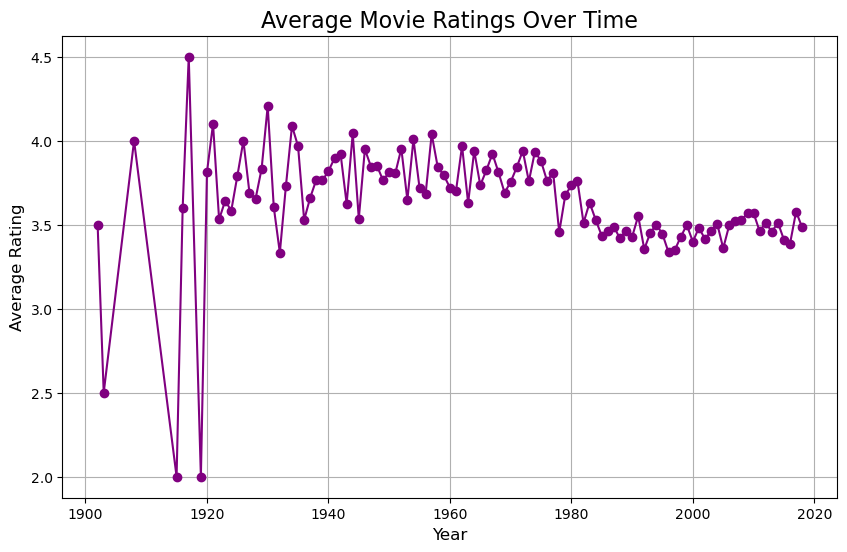

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(avg_ratings_by_year['Year'], avg_ratings_by_year['rating'], color='purple', marker='o')
plt.title('Average Movie Ratings Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(True)
plt.show()

## Visualization 2: Top 10 Genres by Average Rating
#### Split genres into individual rows for more granular analysis

In [20]:
data_genres = data.assign(genre=data['genres'].str.split('|')).explode('genre')

#### Group by 'genre' and calculate the average rating

In [21]:
avg_rating_by_genre = data_genres.groupby('genre')['rating'].mean().sort_values(ascending=False).head(10)

#### Plot the average rating for the top 10 genres

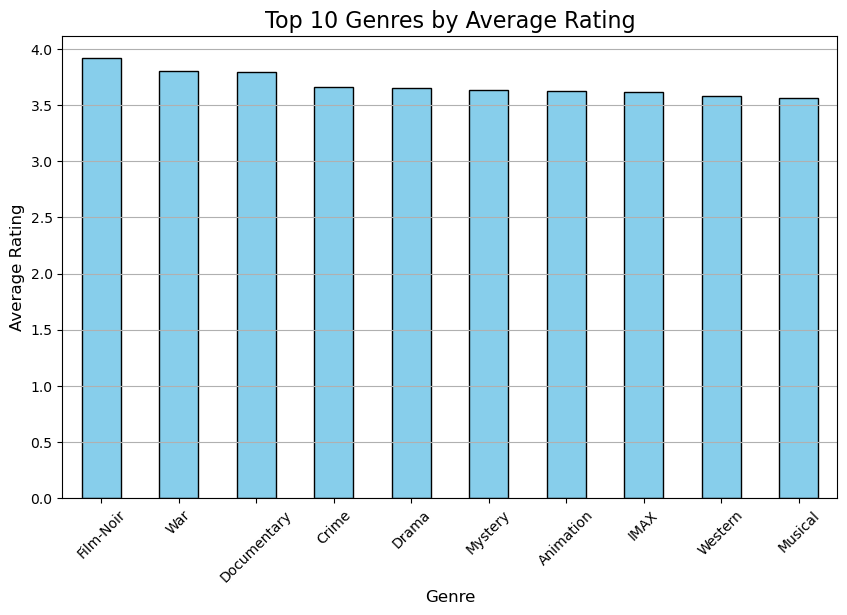

In [22]:
plt.figure(figsize=(10, 6))
avg_rating_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Genres by Average Rating', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Visualization 3: Rating Distribution
#### Plot a histogram of ratings to show the distribution

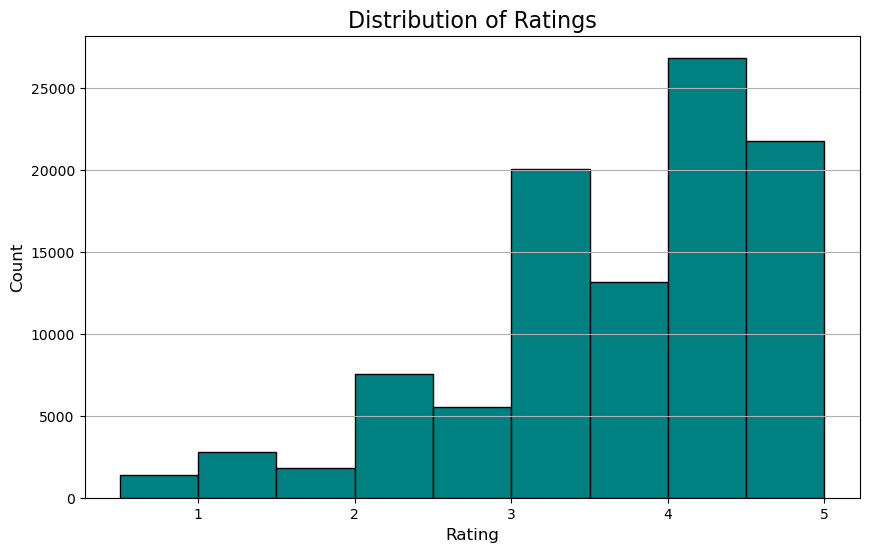

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(data['rating'], bins=np.arange(0.5, 5.5, 0.5), color='teal', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y')
plt.show()

## Visualization 4: Most Rated Movies
#### Find the top 10 movies with the most ratings

In [24]:
most_rated = data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

#### Plot the top 10 most rated movies

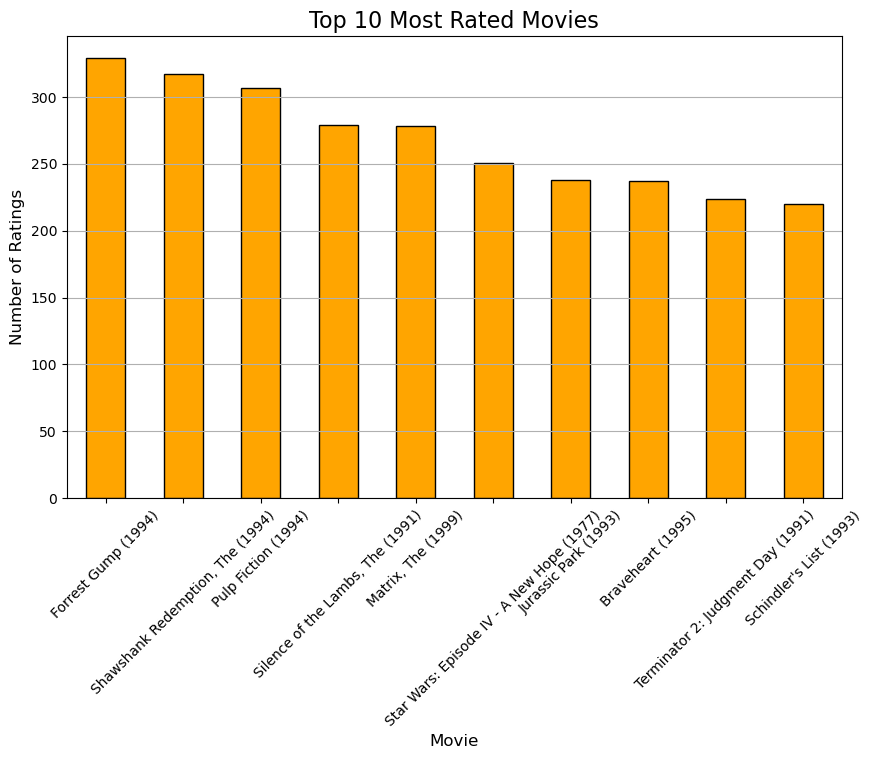

In [25]:
plt.figure(figsize=(10, 6))
most_rated.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Rated Movies', fontsize=16)
plt.xlabel('Movie', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Step 5: Insights
### - Older movies may show a different rating pattern compared to recent releases.
### - Certain genres consistently receive higher ratings.
### - The histogram provides an understanding of user rating behavior.
### - The most rated movies often indicate their popularity among users.